In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import talib
import numpy as np
import data as ds

In [2]:
data_source = ds.DataSource()

In [3]:
codes1 = ['hsi', '03033']
data1 = data_source.get_data(codes1)
print(data1)

{'hsi':       code   lot  nmll       sdate      high       low      open      last  \
0     .HSI  None  恒生指數  2000-01-03  17426.16  17057.70  17057.70  17369.63   
1     .HSI  None  恒生指數  2000-01-04  17303.00  16933.52  17303.00  17072.82   
2     .HSI  None  恒生指數  2000-01-05  16608.55  15688.49  16608.55  15846.72   
3     .HSI  None  恒生指數  2000-01-06  15971.03  14763.97  15942.07  15153.23   
4     .HSI  None  恒生指數  2000-01-07  15513.89  15108.75  15329.34  15405.63   
...    ...   ...   ...         ...       ...       ...       ...       ...   
5126  .HSI  None  恒生指數  2020-10-16  24456.97  24194.41  24194.41  24386.79   
5127  .HSI  None  恒生指數  2020-10-19  24771.85  24478.47  24565.43  24542.26   
5128  .HSI  None  恒生指數  2020-10-20  24600.39  24456.84  24571.64  24569.54   
5129  .HSI  None  恒生指數  2020-10-21  24903.00  24653.16  24695.54  24754.42   
5130  .HSI  None  恒生指數  2020-10-22  24817.01  24556.55  24696.31  24786.13   

               vol  
0              NaN  
1            

In [4]:
# 基本面
data2 = data_source.get_performance(['00700', '09988'])
for k, df in data2.items():
    print(df.columns)

Index(['code', 'year', 'nmll', 'revenue', 'grossProfit', 'grossMargin',
       'operatingIncome', 'pe', 'cashOperating', 'netIncomeSemi',
       'netIncomeEnd', 'epsEnd', 'cpsEnd', 'roeEnd', 'dteEnd', 'pegEnd',
       'netIncomeQ1', 'netIncomeQ2', 'netIncomeQ3', 'netIncomeQ4', 'epsQ1',
       'epsQ2', 'epsQ3', 'epsQ4', 'pegQ1', 'pegQ2', 'pegQ3', 'pegQ4', 'cpsQ1',
       'cpsQ2', 'cpsQ3', 'cpsQ4', 'roeQ1', 'roeQ2', 'roeQ3', 'roeQ4'],
      dtype='object')
Index(['code', 'year', 'nmll', 'revenue', 'grossProfit', 'grossMargin',
       'operatingIncome', 'pe', 'cashOperating', 'netIncomeSemi',
       'netIncomeEnd', 'epsEnd', 'cpsEnd', 'roeEnd', 'dteEnd', 'pegEnd',
       'netIncomeQ1', 'netIncomeQ2', 'netIncomeQ3', 'netIncomeQ4', 'epsQ1',
       'epsQ2', 'epsQ3', 'epsQ4', 'pegQ1', 'pegQ2', 'pegQ3', 'pegQ4', 'cpsQ1',
       'cpsQ2', 'cpsQ3', 'cpsQ4', 'roeQ1', 'roeQ2', 'roeQ3', 'roeQ4'],
      dtype='object')


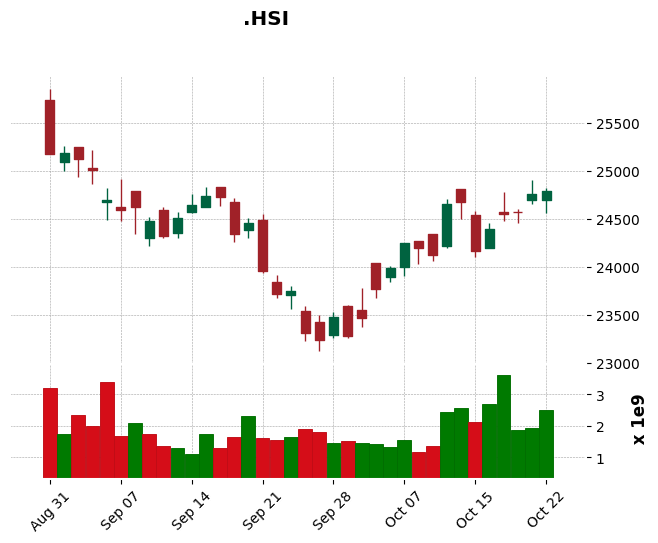

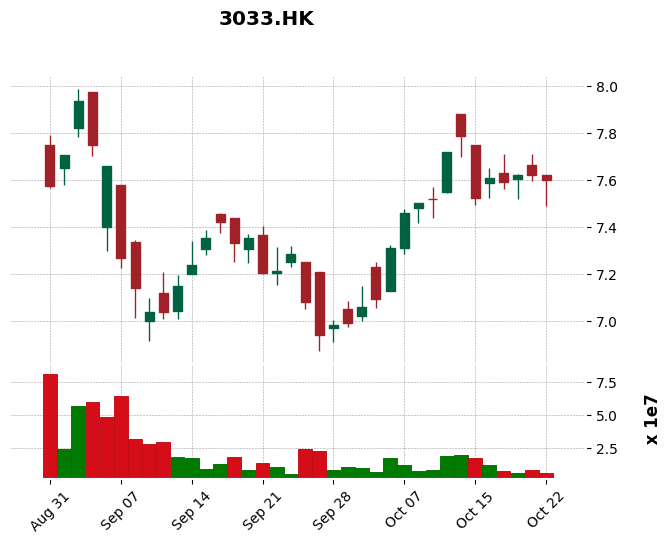

In [5]:
# K线图
for k, df in data1.items():
    df.columns = ['code', 'lot', 'nmll', 'sdate', 'High', 'Low', 'Open', 'Close', 'Volume']
    df["Volume"] = pd.to_numeric(df["Volume"])
    df["Volume"] =  df["Volume"]
    df.index = pd.to_datetime(df.sdate)
    mpf.plot(
        df.tail(36),
        type='candle',
        style='charles',
        title=df.iloc[0]['code'],
        ylabel='',
        ylabel_lower='',
        volume=True)

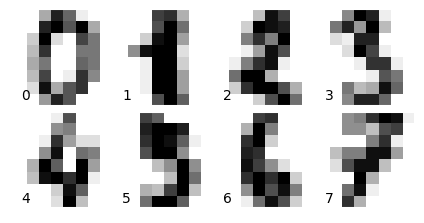

In [6]:
# sklearn 机器学习
digits = datasets.load_digits()
fig = plt.figure(figsize=(4, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))
plt.show()

In [7]:
# 技术指标
for k, df in data1.items():
    lasts = np.array(df['Close'], dtype='float')
    rsi14 = talib.RSI(lasts, timeperiod=14)
    sma10 = talib.SMA(lasts, timeperiod=10)
    print(k, rsi14, sma10)

hsi [        nan         nan         nan ... 55.31827608 58.242399
 58.74113869] [      nan       nan       nan ... 24350.989 24428.366 24482.693]
03033 [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 41.92634561 42.79888388 39.01154303 39.39657126
 42.1497408  36.8674813  33.75621341 35.63641042 35.85426573 38.96879604
 40.52376923 49.1024912  54.07903307 55.33323946 55.98061552 61.92369645
 63.64175755 53.28480714 55.81632959 55.06026708 56.02254922 56.02254922
 55.11015675] [   nan    nan    nan    nan    nan    nan    nan    nan    nan 7.473
 7.4265 7.393  7.358  7.3065 7.2645 7.234  7.2275 7.235  7.2595 7.2635
 7.2425 7.217  7.1805 7.1445 7.121  7.1165 7.142  7.1705 7.194  7.258
 7.3425 7.3965 7.4585 7.5115 7.564  7.595  7.609 ]
